In [1]:
# import the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
from datetime import datetime, date

## 1. HR Analytics

### 1.1 Load and Explore the data

In [2]:
# Load the full dataset
df = pd.read_csv('hr_data.csv')

# Create a copy of the DataFrame
df_new = df.copy()

In [3]:
# Show overview of the dataset
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df_new.groupby(["education"])['avg_training_score'].mean()

education
Bachelor's          63.422046
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

#### 1.1.1 Numeric Data

In [6]:
# numeric data
df_num = df_new.select_dtypes(['int64', 'float64']).copy()
df_num.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


#### 1.1.2 Categorical Data

In [7]:
# categorical data
df_cat = df_new.select_dtypes(['object']).copy()
df_cat.describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


#### 1.1.3 Stratified Sampling

In [8]:
df_new['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [9]:
df1=df[df['is_promoted']==1]
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1
66,77981,Finance,region_22,Bachelor's,m,other,1,27,NaN,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,NaN,1,0,0,61,1


In [10]:
len(df1)

4668

In [11]:
df0=df[df['is_promoted']==0]
df0.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [12]:
df0_sampled = df0.sample(n=len(df1), random_state=2).copy()
df0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           4668 non-null   int64  
 1   department            4668 non-null   object 
 2   region                4668 non-null   object 
 3   education             4438 non-null   object 
 4   gender                4668 non-null   object 
 5   recruitment_channel   4668 non-null   object 
 6   no_of_trainings       4668 non-null   int64  
 7   age                   4668 non-null   int64  
 8   previous_year_rating  4305 non-null   float64
 9   length_of_service     4668 non-null   int64  
 10  KPIs_met >80%         4668 non-null   int64  
 11  awards_won?           4668 non-null   int64  
 12  avg_training_score    4668 non-null   int64  
 13  is_promoted           4668 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


In [13]:
df_new=pd.concat([df1,df0_sampled],axis=0)
df_new['is_promoted'].value_counts()

0    4668
1    4668
Name: is_promoted, dtype: int64

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   object 
 2   region                9336 non-null   object 
 3   education             8984 non-null   object 
 4   gender                9336 non-null   object 
 5   recruitment_channel   9336 non-null   object 
 6   no_of_trainings       9336 non-null   int64  
 7   age                   9336 non-null   int64  
 8   previous_year_rating  8634 non-null   float64
 9   length_of_service     9336 non-null   int64  
 10  KPIs_met >80%         9336 non-null   int64  
 11  awards_won?           9336 non-null   int64  
 12  avg_training_score    9336 non-null   int64  
 13  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


### 1.2 Cleanse and Transform the data

#### 1.2.1 Missing Values

In [15]:
df_new.isnull().sum()

employee_id               0
department                0
region                    0
education               352
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating    702
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

In [16]:
df_new[['length_of_service', 'previous_year_rating']]

,length_of_service,previous_year_rating
11,3,5.0
39,6,5.0
60,17,4.0
66,1,NaN
67,1,NaN
...,...,...
20795,13,4.0
23088,2,4.0
24445,6,1.0
24762,1,NaN


In [17]:
df_new['previous_year_rating'].value_counts()

3.0    2977
5.0    2803
4.0    1664
1.0     667
2.0     523
Name: previous_year_rating, dtype: int64

In [18]:
# Previous Year Rating Column: fill in null values by 3 (average rating)
df_new['previous_year_rating'] = df_new['previous_year_rating'].fillna(3)
df_new.isnull().sum()

employee_id               0
department                0
region                    0
education               352
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
previous_year_rating      0
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
is_promoted               0
dtype: int64

In [19]:
# Median input for education
df_new['education'].value_counts()

Bachelor's          6123
Master's & above    2723
Below Secondary      138
Name: education, dtype: int64

In [20]:
# Education Column: fill in null values with median input 'Bachelor's' 
df_new['education'] = df_new['education'].fillna("Bachelor's")
df_new.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### 1.2.2 New Columns

In [21]:
df_new['age'].describe()

count    9336.000000
mean       34.596937
std         7.449845
min        20.000000
25%        29.000000
50%        33.000000
75%        38.000000
max        60.000000
Name: age, dtype: float64

In [22]:
df_new.loc[df_new['age'].between(20,24), 'age_group'] = 'young adult'
df_new.loc[df_new['age'].between(25,39), 'age_group'] = 'adult'
df_new.loc[df_new['age']>39, 'age_group'] = 'older adult'

In [23]:
df_new['avg_training_score'].describe()

count    9336.000000
mean       67.104863
std        14.569584
min        41.000000
25%        54.000000
50%        65.000000
75%        81.000000
max        99.000000
Name: avg_training_score, dtype: float64

In [24]:
df_new.loc[df_new['avg_training_score'] >= 80, 'good_conduct'] = 1
df_new.loc[df_new['avg_training_score'] < 80, 'good_conduct'] = 0

In [25]:
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,good_conduct
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1,adult,0.0
39,58304,Sales & Marketing,region_28,Bachelor's,m,sourcing,1,33,5.0,6,1,0,51,1,adult,0.0
60,17673,Sales & Marketing,region_4,Master's & above,m,other,1,50,4.0,17,1,0,47,1,older adult,0.0
66,77981,Finance,region_22,Bachelor's,m,other,1,27,3.0,1,1,1,58,1,adult,0.0
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,3.0,1,0,0,61,1,adult,0.0


#### 1.2.3 Data Transformation

In [26]:
df_cat.nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

In [27]:
df_new['region'].describe()

count         9336
unique          34
top       region_2
freq          2026
Name: region, dtype: object

In [28]:
# Map Department region
df_new['region'] = df_new['region'].map( {'region_1': 0, 'region_2': 1, 'region_3': 2, 'region_4': 3, 'region_5': 4,
                                         'region_6': 5, 'region_7': 6, 'region_8': 7, 'region_9': 8, 'region_10': 9,
                                         'region_11': 10, 'region_12': 11, 'region_13': 12, 'region_14': 13, 
                                         'region_15': 14, 'region_16': 15, 'region_17': 16, 'region_18': 17,
                                         'region_19': 18, 'region_20': 19, 'region_21': 20, 'region_22': 21, 
                                         'region_23': 22, 'region_24': 23, 'region_25': 24, 'region_26': 25, 
                                         'region_27': 26, 'region_28': 27, 'region_29': 28, 'region_30': 29,
                                         'region_31': 30, 'region_32': 31, 'region_33': 32, 'region_34': 33} ).astype(int)

In [29]:
# Map Department
df_new['department'] = df_new['department'].map( {'Sales & Marketing': 0, 'Operations': 1,
                                                    'Procurement': 2, 'Technology': 3,
                                                    'Analytics': 4, 'Finance': 5,
                                                    'HR': 6, 'Legal': 7, 'R&D': 8} ).astype(int)

In [30]:
# Map Education
df_new['education'] = df_new['education'].map( {"Master's & above": 0, "Bachelor's": 1, 'Below Secondary': 2} ).astype(int)

In [31]:
# Map Gender
df_new['gender'] = df_new['gender'].map( {"m": 0, "f": 1} ).astype(int)

In [32]:
# Map Recruitment Channel
df_new['recruitment_channel'] = df_new['recruitment_channel'].map( {"other": 0, "sourcing": 1, "referred": 2} ).astype(int)


In [33]:
# Map age_group
df_new['age_group'] = df_new['age_group'].map( {"young adult": 0, "adult": 1, 'older adult': 2} ).astype(int)

In [34]:
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,good_conduct
11,49017,0,6,1,1,1,1,35,5.0,3,1,0,50,1,1,0.0
39,58304,0,27,1,0,1,1,33,5.0,6,1,0,51,1,1,0.0
60,17673,0,3,0,0,0,1,50,4.0,17,1,0,47,1,2,0.0
66,77981,5,21,1,0,0,1,27,3.0,1,1,1,58,1,1,0.0
67,16502,0,21,1,0,1,1,27,3.0,1,0,0,61,1,1,0.0


In [35]:
df_new.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,good_conduct
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,38869.959940,2.045737,13.053985,0.723115,0.304413,0.473329,1.228685,34.596937,3.579799,5.759533,0.508569,0.066945,67.104863,0.500000,1.178663,0.275064
std,22642.619782,1.976441,9.901436,0.479382,0.460183,0.547611,0.567723,7.449845,1.176841,4.146011,0.499953,0.249940,14.569584,0.500027,0.455872,0.446571
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000
25%,19135.500000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000,1.000000,0.000000
50%,38955.500000,2.000000,12.000000,1.000000,0.000000,0.000000,1.000000,33.000000,3.000000,5.000000,1.000000,0.000000,65.000000,0.500000,1.000000,0.000000
75%,58222.750000,3.000000,21.000000,1.000000,1.000000,1.000000,1.000000,38.000000,5.000000,7.000000,1.000000,0.000000,81.000000,1.000000,1.000000,1.000000
max,78292.000000,8.000000,33.000000,2.000000,1.000000,2.000000,7.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000,2.000000,1.000000


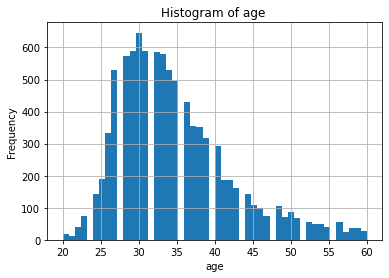

In [36]:
# Before Normalization
plt.hist(df_new['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age ')
plt.grid(True)

plt.show()

In [37]:
df_new.describe()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,good_conduct
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,38869.959940,2.045737,13.053985,0.723115,0.304413,0.473329,1.228685,34.596937,3.579799,5.759533,0.508569,0.066945,67.104863,0.500000,1.178663,0.275064
std,22642.619782,1.976441,9.901436,0.479382,0.460183,0.547611,0.567723,7.449845,1.176841,4.146011,0.499953,0.249940,14.569584,0.500027,0.455872,0.446571
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000
25%,19135.500000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000,1.000000,0.000000
50%,38955.500000,2.000000,12.000000,1.000000,0.000000,0.000000,1.000000,33.000000,3.000000,5.000000,1.000000,0.000000,65.000000,0.500000,1.000000,0.000000
75%,58222.750000,3.000000,21.000000,1.000000,1.000000,1.000000,1.000000,38.000000,5.000000,7.000000,1.000000,0.000000,81.000000,1.000000,1.000000,1.000000
max,78292.000000,8.000000,33.000000,2.000000,1.000000,2.000000,7.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000,2.000000,1.000000


In [38]:
# Min-Max normalization for age column
df_new["age"] = (df_new["age"] - df_new["age"].min()) / (df_new["age"].max()-df_new["age"].min())

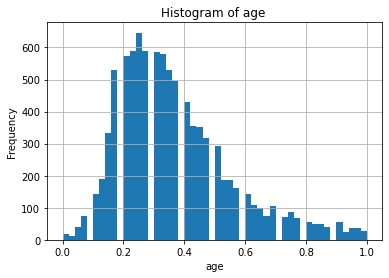

In [39]:
# After Normalization
plt.hist(df_new['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age ')
plt.grid(True)

plt.show()

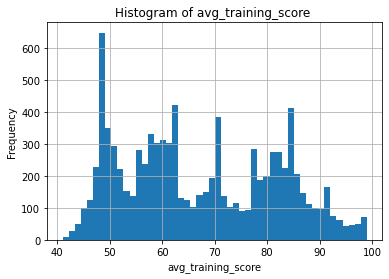

In [40]:
# avg_training_score
plt.hist(df_new['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score ')
plt.grid(True)

plt.show()

In [41]:
# Min-Max normalization for avg_training_score column
df_new["avg_training_score"] = (df_new["avg_training_score"] - df_new["avg_training_score"].min()) / (df_new["avg_training_score"].max()-df_new["avg_training_score"].min())
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,good_conduct
11,49017,0,6,1,1,1,1,0.375,5.0,3,1,0,0.155172,1,1,0.0
39,58304,0,27,1,0,1,1,0.325,5.0,6,1,0,0.172414,1,1,0.0
60,17673,0,3,0,0,0,1,0.750,4.0,17,1,0,0.103448,1,2,0.0
66,77981,5,21,1,0,0,1,0.175,3.0,1,1,1,0.293103,1,1,0.0
67,16502,0,21,1,0,1,1,0.175,3.0,1,0,0,0.344828,1,1,0.0


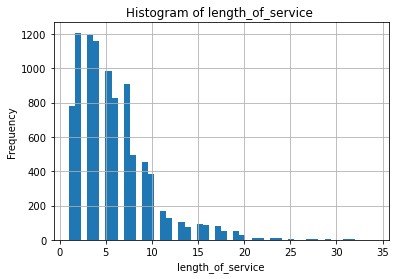

In [42]:
plt.hist(df_new['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service ')
plt.grid(True)

plt.show()

In [43]:
# Min-Max normalization for length_of_service column
df_new["length_of_service"] = (df_new["length_of_service"] - df_new["length_of_service"].min()) /(df_new["length_of_service"].max()-df_new["length_of_service"].min())

In [44]:
df_new.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,good_conduct
11,49017,0,6,1,1,1,1,0.375,5.0,0.060606,1,0,0.155172,1,1,0.0
39,58304,0,27,1,0,1,1,0.325,5.0,0.151515,1,0,0.172414,1,1,0.0
60,17673,0,3,0,0,0,1,0.750,4.0,0.484848,1,0,0.103448,1,2,0.0
66,77981,5,21,1,0,0,1,0.175,3.0,0.000000,1,1,0.293103,1,1,0.0
67,16502,0,21,1,0,1,1,0.175,3.0,0.000000,0,0,0.344828,1,1,0.0


### 1.3 Correlation Analysis

#### 1.3.1 Drop irrelevant features/columns

In [45]:
df_new = df_new.drop(['employee_id'], axis = 1)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,good_conduct
11,0,6,1,1,1,1,0.375,5.0,0.060606,1,0,0.155172,1,1,0.0
39,0,27,1,0,1,1,0.325,5.0,0.151515,1,0,0.172414,1,1,0.0
60,0,3,0,0,0,1,0.750,4.0,0.484848,1,0,0.103448,1,2,0.0
66,5,21,1,0,0,1,0.175,3.0,0.000000,1,1,0.293103,1,1,0.0
67,0,21,1,0,1,1,0.175,3.0,0.000000,0,0,0.344828,1,1,0.0


#### 1.3.2 Graphs and correlation

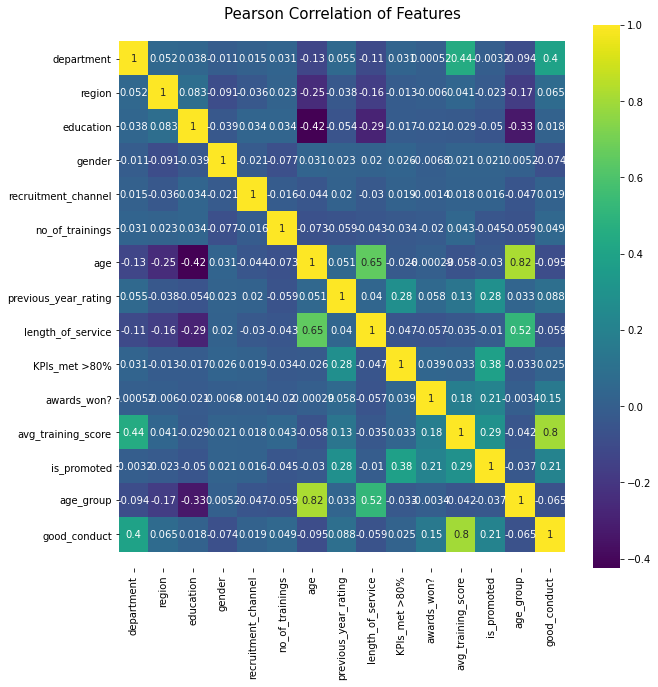

In [46]:
# Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_new.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

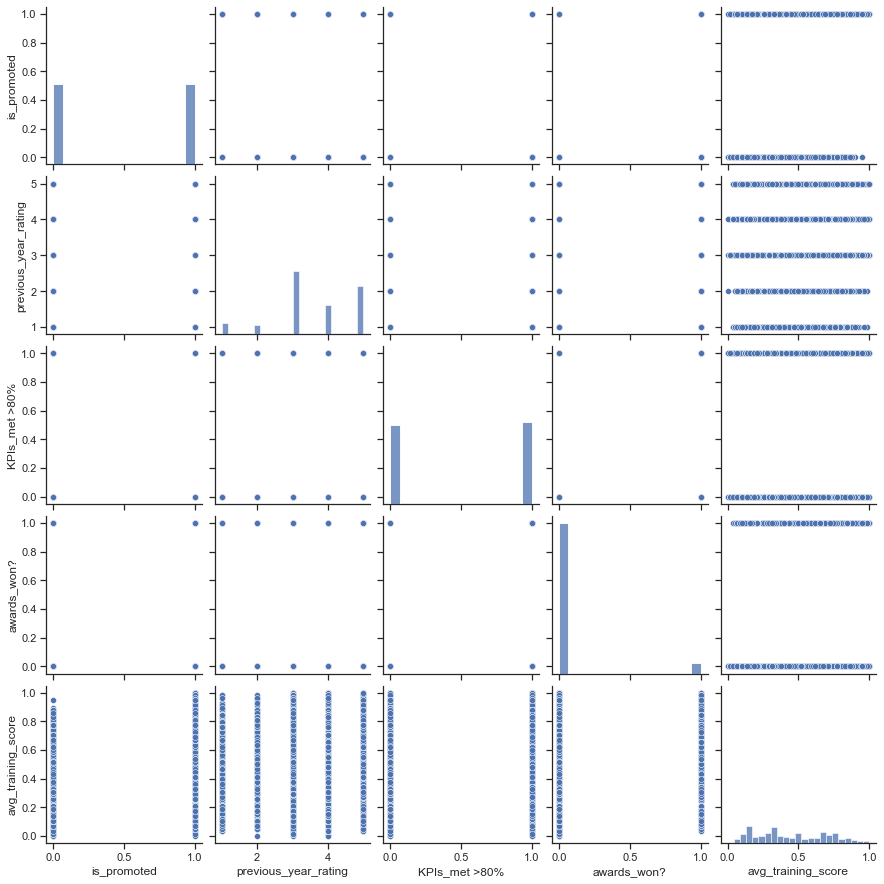

In [47]:
#scatter matrix
sns.set(style="ticks")
sns.pairplot(df_new[['is_promoted', 'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']])

### 1.4 Export the data

In [48]:
df_new.to_csv('hr_data_new.csv', index=False)

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   int32  
 1   region                9336 non-null   int32  
 2   education             9336 non-null   int32  
 3   gender                9336 non-null   int32  
 4   recruitment_channel   9336 non-null   int32  
 5   no_of_trainings       9336 non-null   int64  
 6   age                   9336 non-null   float64
 7   previous_year_rating  9336 non-null   float64
 8   length_of_service     9336 non-null   float64
 9   KPIs_met >80%         9336 non-null   int64  
 10  awards_won?           9336 non-null   int64  
 11  avg_training_score    9336 non-null   float64
 12  is_promoted           9336 non-null   int64  
 13  age_group             9336 non-null   int32  
 14  good_conduct          9336 non-null   float64
dtypes: float64(5), int3

- department: 0 = Sales & Marketing, 1 = Operations, 2 = Procurement, 3 = Technology, 4 = Analytics, 5 = Finance, 6 = HR, 7 = Legal, 8 = R&D
- region: 0 = region_1, 1 = region_2, .... ,33 = region_34
- education: 0 = Unknown, 1 = Master's & above, 2 = Bachelor's, 3 = Below Secondary
- gender: 0 = male, 1 = female
- recruitment channel: 0 = other, 1 = sourcing, 2 = referred
- no_of_trainings: # of other trainings completed in previous year on soft skills, technical skills etc.
- age: normalised to 0 - 1, i.e. the percentile of the age
- previous_year_rating: Employee reting for the previous year from 1 (worst) to 5 (best)
- length_of_service: Service in years normalised to 0 - 1, i.e. the percentile of the length_of_service
- KPIs_met >80%: 0 = No, 1 = Yes
- awards_won?: 0 = No, 1 = Yes
- avg_training_score: normalised to 0 - 1, i.e. the percentile of the avg_training_score
- is_promoted: 0 = No, 1 = Yes
- age_group: 0 = young adult, 1 = adult, 2 = older adult
- good_conduct: 0 = No, 1 = Yes

## 2. Airbnb

### 2.1 Load and Explore the data

In [50]:
# Load the full dataset
df2 = pd.read_csv('listings.csv')


# Create a copy of the DataFrame
df2_new = df2.copy()

In [51]:
# Show overview of the dataset
df2_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [52]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

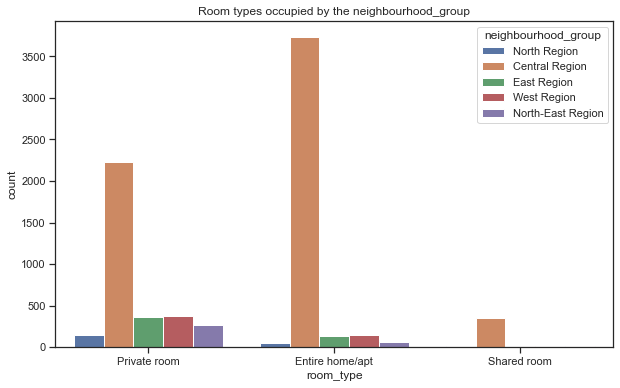

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df2_new)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

#### 2.1.1 Numeric Data

In [54]:
# numeric data
df2_num = df2_new.select_dtypes(['int64', 'float64']).copy()

In [55]:
df2_num.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


#### 2.1.2 Categorical Data

In [56]:
# categorical data
df2_cat = df2_new.select_dtypes(['object']).copy()

In [57]:
df2_cat.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


### 2.2 Cleanse and Transform the data

#### 2.2.1 Outliers

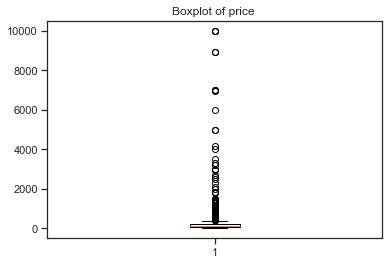

In [58]:
plt.boxplot(df2_num['price'].dropna())
plt.title('Boxplot of price ')

plt.show()

In [59]:
df2_num['price'].describe()

count     7907.000000
mean       169.332996
std        340.187599
min          0.000000
25%         65.000000
50%        124.000000
75%        199.000000
max      10000.000000
Name: price, dtype: float64

In [60]:
IQR = 199 - 65
Max = 1.5 * IQR + 199
Min = 65 - 1.5 * IQR
print(Max, Min)
# Outliers are the people with price above $400

400.0 -136.0


In [61]:
df2_new = df2_new.loc[df2_new['price'] <= 400].reset_index()
df2_new['price'].describe()

count    7583.000000
mean      135.398919
std        86.096535
min         0.000000
25%        64.000000
50%       119.000000
75%       185.000000
max       400.000000
Name: price, dtype: float64

#### 2.2.2 Missing Values

In [62]:
df2_new.isnull().sum()

index                                0
id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2597
reviews_per_month                 2597
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [63]:
df2_new[['reviews_per_month', 'last_review']].loc[df2_new['reviews_per_month'].isnull()]

,reviews_per_month,last_review
17,NaN,NaN
22,NaN,NaN
25,NaN,NaN
27,NaN,NaN
28,NaN,NaN
...,...,...
7578,NaN,NaN
7579,NaN,NaN
7580,NaN,NaN
7581,NaN,NaN


In [64]:
# Reviews_Per_Month Column: fill in null values by 0 (null values mean that guest never made a review, hence 0)
df2_new['reviews_per_month'] = df2_new['reviews_per_month'].fillna(0)
df2_new.isnull().sum()

index                                0
id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2597
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [65]:
df2_new['last_review']

0       2013-10-21
1       2014-12-26
2       2015-10-01
3       2019-08-11
4       2019-07-28
           ...    
7578           NaN
7579           NaN
7580           NaN
7581           NaN
7582           NaN
Name: last_review, Length: 7583, dtype: object

In [66]:
temp = pd.to_datetime(df2_new['last_review'])
max_date = max(temp)
min_date = min(temp)

print('Max Date: {}'.format(max_date))
print('Min Date: {}'.format(min_date))

Max Date: 2019-08-27 00:00:00
Min Date: 2013-10-21 00:00:00


In [67]:
i = 0
while i < len(df2_new['last_review']):
    if pd.isnull(temp[i]):
        df2_new['last_review'][i] = (max_date - min_date).days + 1
    else:
        df2_new['last_review'][i] = (max_date - temp[i]).days
    i += 1
    
df2_new['last_review']

<ipython-input-67-c1518a80925d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['last_review'][i] = (max_date - temp[i]).days
<ipython-input-67-c1518a80925d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_new['last_review'][i] = (max_date - min_date).days + 1


0       2136
1       1705
2       1426
3         16
4         30
        ... 
7578    2137
7579    2137
7580    2137
7581    2137
7582    2137
Name: last_review, Length: 7583, dtype: object

In [68]:
# change datatype to int
df2_new['last_review'] = df2_new['last_review'].astype(str).astype(int)

#### 2.2.3 Data Transformation

In [69]:
df2_cat.nunique()

name                   7457
host_name              1833
neighbourhood_group       5
neighbourhood            43
room_type                 3
last_review            1001
dtype: int64

In [70]:
# Map Room Type
df2_new['room_type'] = df2_new['room_type'].map( {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2} ).astype(int)


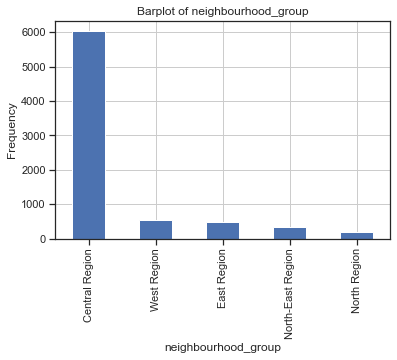

In [71]:
# Graph of neighbourhoods
df2_new.neighbourhood_group.value_counts().plot.bar()
plt.xlabel('neighbourhood_group')
plt.ylabel('Frequency') 
plt.title('Barplot of neighbourhood_group')
plt.grid(True)
plt.show()

In [72]:
# Reduce data by neighbourhood_group
df2_new = df2_new.loc[df2_new['neighbourhood_group'] == 'Central Region'].reset_index()
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   level_0                         6024 non-null   int64  
 1   index                           6024 non-null   int64  
 2   id                              6024 non-null   int64  
 3   name                            6023 non-null   object 
 4   host_id                         6024 non-null   int64  
 5   host_name                       6024 non-null   object 
 6   neighbourhood_group             6024 non-null   object 
 7   neighbourhood                   6024 non-null   object 
 8   latitude                        6024 non-null   float64
 9   longitude                       6024 non-null   float64
 10  room_type                       6024 non-null   int32  
 11  price                           6024 non-null   int64  
 12  minimum_nights                  60

In [73]:
df2_new['neighbourhood'].value_counts()

Kallang             1002
Geylang              965
Novena               532
Rochor               501
Outram               467
Bukit Merah          456
Downtown Core        405
River Valley         347
Queenstown           263
Tanglin              197
Marine Parade        169
Singapore River      149
Bukit Timah          128
Newton               125
Orchard              110
Toa Payoh            100
Museum                52
Bishan                52
Southern Islands       4
Name: neighbourhood, dtype: int64

In [74]:
# Replace uncommon neighbourhoods
df2_new['neighbourhood'] = df2_new['neighbourhood'].replace(['Southern Islands', 'Museum', 'Bishan',
       'Toa Payoh', 'Orchard', 'Newton', 'Bukit Timah', 'Singapore River', 'Marine Parade',
       'Tanglin', 'Queenstown', 'River Valley'], 'Others')

In [75]:
df2_new['neighbourhood'].unique()

array(['Others', 'Bukit Merah', 'Geylang', 'Rochor', 'Outram', 'Kallang',
       'Novena', 'Downtown Core'], dtype=object)

In [76]:
df2_new['neighbourhood'] = df2_new['neighbourhood'].map( {'Others': 0, 'Kallang': 1, 'Geylang': 2,
                                                          'Novena': 3, 'Rochor': 4, 'Outram': 5, 
                                                          'Bukit Merah': 6, 'Downtown Core': 7}).astype(int)
df2_new.head()

,level_0,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,0,1.33235,103.78521,1,81,90,18,1705,0.28,1,365
1,10,10,275343,Conveniently located City Room!( (Phone number...,1439258,K2 Guesthouse,Central Region,6,1.28875,103.80814,1,44,15,18,128,0.23,32,331
2,11,11,275344,15 mins to Outram MRT Single Room (B),1439258,K2 Guesthouse,Central Region,6,1.28837,103.81099,1,40,30,10,348,0.11,32,276
3,12,13,294281,5 mins walk from Newton subway,1521514,Elizabeth,Central Region,0,1.31125,103.83816,1,65,2,125,5,1.35,6,336
4,13,14,324945,20 Mins to Sentosa @ Hilltop ! (8),1439258,K2 Guesthouse,Central Region,6,1.28976,103.80896,1,44,30,13,206,0.15,32,340


In [77]:
df2_new.describe()

,level_0,index,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,6024.000000,6024.000000,6.024000e+03,6.024000e+03,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.00000
mean,3947.428287,4091.232902,2.399882e+07,9.175333e+07,2.396746,1.303842,103.851188,0.476262,144.686421,15.703353,13.252490,859.060093,0.711295,48.115372,213.36753
std,2180.688292,2271.296663,1.007925e+07,8.396474e+07,2.268605,0.016346,0.025284,0.603081,86.657481,36.290860,29.292422,948.440102,1.151071,68.702767,143.67383
min,1.000000,1.000000,5.064600e+04,2.366600e+04,0.000000,1.245260,103.763270,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,2066.750000,2129.750000,1.647728e+07,2.088305e+07,0.000000,1.291170,103.839397,0.000000,75.000000,2.000000,0.000000,30.000000,0.000000,2.750000,61.00000
50%,4094.500000,4222.500000,2.617668e+07,6.161981e+07,2.000000,1.306340,103.849555,0.000000,131.000000,3.000000,2.000000,241.000000,0.200000,14.000000,264.00000
75%,5827.250000,6047.250000,3.267188e+07,1.598048e+08,4.000000,1.314660,103.862700,1.000000,199.000000,10.000000,11.000000,2137.000000,0.950000,67.000000,353.25000
max,7582.000000,7906.000000,3.811276e+07,2.885676e+08,7.000000,1.365830,103.918220,2.000000,400.000000,1000.000000,307.000000,2137.000000,13.000000,274.000000,365.00000


In [78]:
# Min-Max normalization last_review
df2_new["last_review"] = (df2_new["last_review"] - df2_new["last_review"].min()) / (df2_new["last_review"].max()-df2_new["last_review"].min())

In [79]:
# Min-Max normalization number_of_reviews
df2_new["number_of_reviews"] = (df2_new["number_of_reviews"] - df2_new["number_of_reviews"].min()) / (df2_new["number_of_reviews"].max()-df2_new["number_of_reviews"].min())

In [80]:
# Min-Max normalization for availability_365 column
df2_new["availability_365"] = (df2_new["availability_365"] - df2_new["availability_365"].min()) / (df2_new["availability_365"].max()-df2_new["availability_365"].min())

In [81]:
# Min-Max normalization for calculated_host_listings_count column
df2_new["calculated_host_listings_count"] = (df2_new["calculated_host_listings_count"] - df2_new["calculated_host_listings_count"].min()) / (df2_new["calculated_host_listings_count"].max()-df2_new["calculated_host_listings_count"].min())

In [82]:
# Min-Max normalization for minimum_nights column
df2_new["minimum_nights"] = (df2_new["minimum_nights"] - df2_new["minimum_nights"].min()) / (df2_new["minimum_nights"].max()-df2_new["minimum_nights"].min())

In [83]:
df2_new.describe()

,level_0,index,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,6024.000000,6024.000000,6.024000e+03,6.024000e+03,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000,6024.000000
mean,3947.428287,4091.232902,2.399882e+07,9.175333e+07,2.396746,1.303842,103.851188,0.476262,144.686421,0.014718,0.043168,0.401993,0.711295,0.172584,0.584569
std,2180.688292,2271.296663,1.007925e+07,8.396474e+07,2.268605,0.016346,0.025284,0.603081,86.657481,0.036327,0.095415,0.443818,1.151071,0.251658,0.393627
min,1.000000,1.000000,5.064600e+04,2.366600e+04,0.000000,1.245260,103.763270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2066.750000,2129.750000,1.647728e+07,2.088305e+07,0.000000,1.291170,103.839397,0.000000,75.000000,0.001001,0.000000,0.014038,0.000000,0.006410,0.167123
50%,4094.500000,4222.500000,2.617668e+07,6.161981e+07,2.000000,1.306340,103.849555,0.000000,131.000000,0.002002,0.006515,0.112775,0.200000,0.047619,0.723288
75%,5827.250000,6047.250000,3.267188e+07,1.598048e+08,4.000000,1.314660,103.862700,1.000000,199.000000,0.009009,0.035831,1.000000,0.950000,0.241758,0.967808
max,7582.000000,7906.000000,3.811276e+07,2.885676e+08,7.000000,1.365830,103.918220,2.000000,400.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000


### 2.3 Correlation Analysis

#### 2.3.1 Drop irrelevant features/columns

In [84]:
df2_new = df2_new.drop(['level_0', 'index', 'name', 'id', 'host_id', 'host_name', 'neighbourhood_group'], axis = 1)
df2_new.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,1.33235,103.78521,1,81,0.089089,0.058632,0.797847,0.28,0.000000,1.000000
1,6,1.28875,103.80814,1,44,0.014014,0.058632,0.059897,0.23,0.113553,0.906849
2,6,1.28837,103.81099,1,40,0.029029,0.032573,0.162845,0.11,0.113553,0.756164
3,0,1.31125,103.83816,1,65,0.001001,0.407166,0.002340,1.35,0.018315,0.920548
4,6,1.28976,103.80896,1,44,0.029029,0.042345,0.096397,0.15,0.113553,0.931507


In [85]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6024 non-null   int32  
 1   latitude                        6024 non-null   float64
 2   longitude                       6024 non-null   float64
 3   room_type                       6024 non-null   int32  
 4   price                           6024 non-null   int64  
 5   minimum_nights                  6024 non-null   float64
 6   number_of_reviews               6024 non-null   float64
 7   last_review                     6024 non-null   float64
 8   reviews_per_month               6024 non-null   float64
 9   calculated_host_listings_count  6024 non-null   float64
 10  availability_365                6024 non-null   float64
dtypes: float64(8), int32(2), int64(1)
memory usage: 470.8 KB


#### 2.3.2 Graphs and correlation

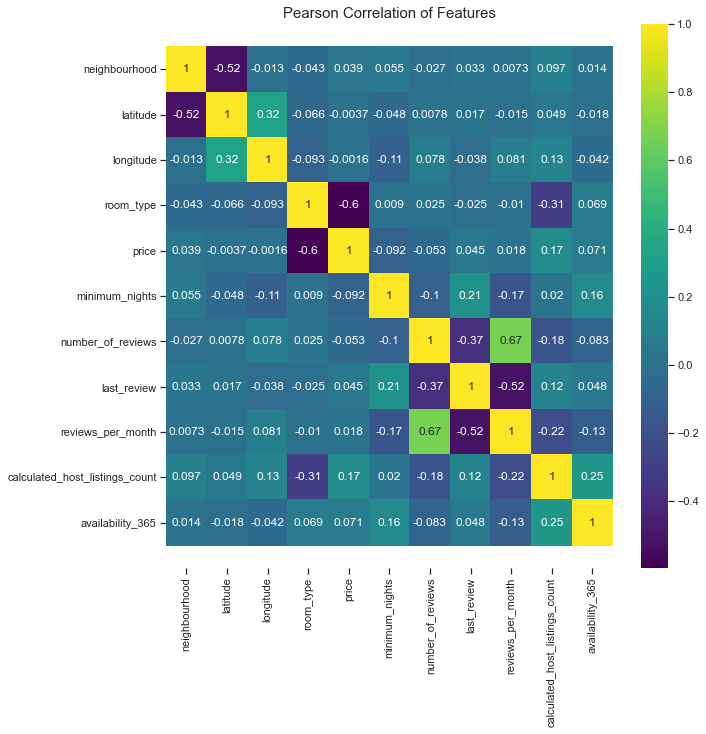

In [86]:
# Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df2_new.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

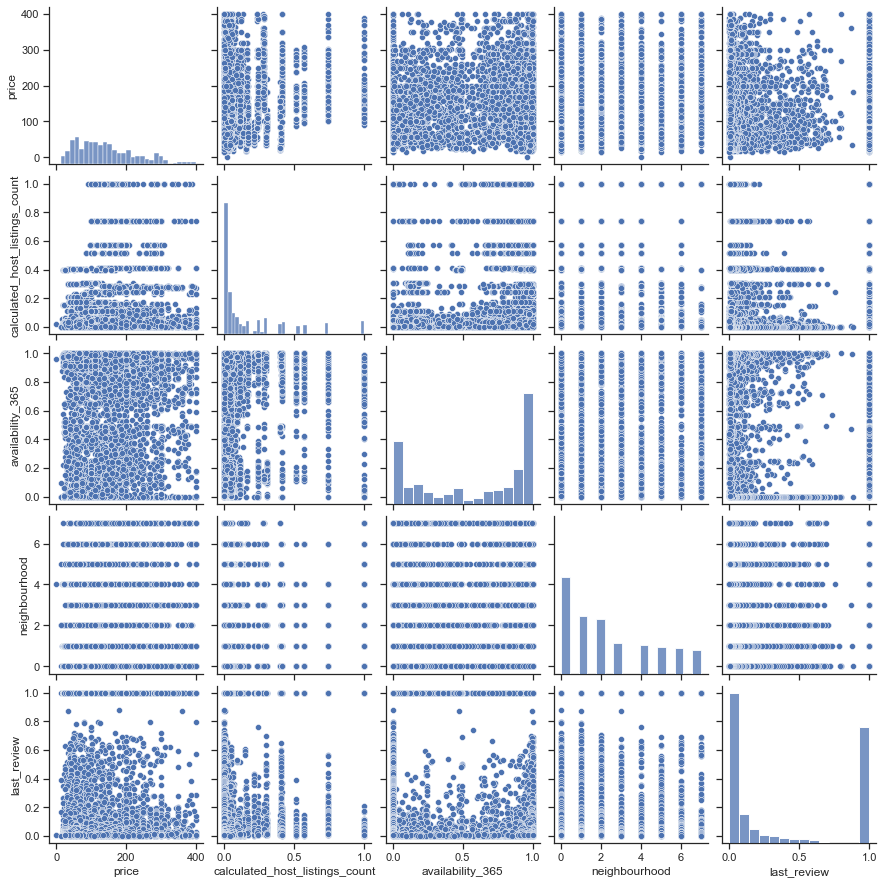

In [87]:
#scatter matrix
sns.set(style="ticks")
sns.pairplot(df2_new[['price', 'calculated_host_listings_count', 'availability_365', 'neighbourhood', 'last_review']])

### 2.4 Export the data

In [88]:
df2_new.to_csv('listings_new.csv', index=False)

In [89]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6024 non-null   int32  
 1   latitude                        6024 non-null   float64
 2   longitude                       6024 non-null   float64
 3   room_type                       6024 non-null   int32  
 4   price                           6024 non-null   int64  
 5   minimum_nights                  6024 non-null   float64
 6   number_of_reviews               6024 non-null   float64
 7   last_review                     6024 non-null   float64
 8   reviews_per_month               6024 non-null   float64
 9   calculated_host_listings_count  6024 non-null   float64
 10  availability_365                6024 non-null   float64
dtypes: float64(8), int32(2), int64(1)
memory usage: 470.8 KB


- <b>The dataset is focused on prices within the central region</b>

- neighbourhood: 0 = Others, 1 = Kallang, 2 = Geylang, 3 = Novena, 4 = Rochor, 5 = Outram, 6 = Bukit Merah, 7 = Downtown Core
- latitude: latitude coordinates
- longitute: longitude coordinates
- room_type: 0 = Entire home/apt, 1 = Private room, 2 = Shared room
- price: daily rental prices between 0 - 400
- minimum_nights: # of nights minimum normalised to 0 - 1, i.e. the percentile of the minimum_nights
- number_of_reviews: # of reviews
- last_review: # of days since last review, normalised to 0 - 1, i.e. the percentile of the last_review
- reviews_per_month: # of reviews each month
- calculated_host_listings_count: # of listing per host, normalised to 0 - 1, i.e. the percentile of the calculated_host_listings_count
- availability: # of days when listing is available for booking, normalised to 0 - 1, i.e. the percentile of the availability